# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Abdul Azis Sukmawan
- **Email:** sukmawanabdul@gmail.com
- **ID Dicoding:** amawan

## Menentukan Pertanyaan Bisnis

1. Berapa total revenue penjualan saller di berbagai negara bagian ?
2. Berapa perbedaan total revenue penjualan saller di berbagai negara bagian dalam setahun terakhir ?
3. Bagaimana perbandingan saller di berbagai negara bagian dalam beberapa bulan terakhir dalam setahun ?
4. Jenis kategori product apa yang laris dalam penjualan saller dalam setahun terakhir ?

## Import Semua Packages/Library yang Digunakan

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset from [E-Commerce Public Dataset](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view)

In [92]:
order_items_df = pd.read_csv('data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [93]:
product_categories_df = pd.read_csv('data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_categories_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [94]:
products_df = pd.read_csv('data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [95]:
sellers_df = pd.read_csv('data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

### Data order_items_df

In [96]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [97]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Pada info di atas tidak ada nya missing values, namun ada kesalahan tipe data pada kolom shipping_limit_date yang bertipe object, yang seharusnya tipe tersebut bertipe datetime

In [98]:
print('Data duplicated ', order_items_df.duplicated().sum())
order_items_df.describe()

Data duplicated  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Pada info di atas data duplikasi aman, dan untuk paramter statistik tersebut pada kolom freight_value bagian min terdapat keanehan nilai yang 0

### Data product_categories_df

In [99]:
product_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [100]:
product_categories_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Hal ini tidak adanya data missing values dan tipe data tersebut aman

In [101]:
print('duplicated data ', product_categories_df.duplicated().sum())
product_categories_df.describe()

duplicated data  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Info di atas tidak ada nya data duplicated dan tipe data tersebut aman

### Data products_df

In [102]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [103]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing values dari semua kolom kecuali product_id dan tipe data di bagian float64 perlu di ubah ke nilai integer karena populasi data tersebut nilai bulatt (koma di belakang bernilai 0)

In [104]:
print('data duplicated ', products_df.duplicated().sum())
products_df.describe()

data duplicated  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Info di atas tidak adanya data duplicated dan untuk parameter statistik min di kolom product_weight_g ada ke anehan yang bernilai 0

### Data sellers_df

In [105]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [106]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak ada keanehan pada tipe data dan juga tidak ada data missing values

In [107]:
print('data duplicated ', sellers_df.duplicated().sum())
sellers_df.describe()

data duplicated  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Tidak ada data duplikasi dan juga tidak ada keanehan pada parameter statistik di atas

## Cleaning Data

### order_items_df

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom shipping_limit_date yang seharusnya bertipe datetime.

In [108]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [109]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [110]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Menangani inaccurate value

In [111]:
order_items_df[order_items_df.freight_value == order_items_df.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


### products_df

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom.
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

In [112]:
float_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for column in float_columns:
    products_df[column] = products_df[column].astype('Int64')

In [113]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32341 non-null  object
 2   product_name_lenght         32341 non-null  Int64 
 3   product_description_lenght  32341 non-null  Int64 
 4   product_photos_qty          32341 non-null  Int64 
 5   product_weight_g            32949 non-null  Int64 
 6   product_length_cm           32949 non-null  Int64 
 7   product_height_cm           32949 non-null  Int64 
 8   product_width_cm            32949 non-null  Int64 
dtypes: Int64(7), object(2)
memory usage: 2.5+ MB


Menangani missing vallue

- product_category_name         610
- product_name_lenght           610
- product_description_lenght    610
- product_photos_qty            610
- product_weight_g                2
- product_length_cm               2
- product_height_cm               2
- product_width_cm                2

In [114]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,<NA>,<NA>,<NA>,650,17,14,12
128,d8dee61c2034d6d075997acef1870e9b,NaN,<NA>,<NA>,<NA>,300,16,7,20
145,56139431d72cd51f19eb9f7dae4d1617,NaN,<NA>,<NA>,<NA>,200,20,20,20
154,46b48281eb6d663ced748f324108c733,NaN,<NA>,<NA>,<NA>,18500,41,30,41
197,5fb61f482620cb672f5e586bb132eae9,NaN,<NA>,<NA>,<NA>,300,35,7,12
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,<NA>,<NA>,<NA>,1800,30,20,70
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,<NA>,<NA>,<NA>,800,30,10,23
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,<NA>,<NA>,<NA>,200,21,8,16
32772,fa51e914046aab32764c41356b9d4ea4,NaN,<NA>,<NA>,<NA>,1300,45,16,45


In [115]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60,865,3,<NA>,<NA>,<NA>,<NA>
18851,5eb564652db742ff8f28759cd8d2652a,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Dari hasil observasi di atas, dengan data missing value dengan jumlah 610 sebaiknya di drop saja, namun untuk data yang missing value nya berjumlah 2, hanya satu data saja yang di drop

In [116]:
products_df.dropna(how='all', subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

In [117]:
products_df.drop(products_df[products_df['product_id'] == '5eb564652db742ff8f28759cd8d2652a'].index, inplace=True)

In [118]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [119]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20


Menangani inacurrate value

In [120]:
products_df[products_df.product_weight_g == products_df.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51,529,1,0,30,25,30
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48,528,1,0,30,25,30
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53,528,1,0,30,25,30
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53,528,1,0,30,25,30


In [121]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


Tidak ada hal yang harus di ubah

## Exploratory Data Analysis (EDA)

### Menentukan Pertanyaan bisnis

1. Berapa total revenue penjualan saller di berbagai negara bagian ?
2. Berapa perbedaan total revenue penjualan saller di berbagai negara bagian dalam setahun terakhir ?
3. Bagaimana perbandingan saller di berbagai negara bagian dalam beberapa bulan terakhir dalam setahun ?
4. Jenis kategori product apa yang laris dalam penjualan saller dalam setahun terakhir ?

### Eksplorasi Data sallers_df

In [122]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, memperoleh informasi jumlah sellers sebanyak 3095. dengan penjualan terbanyak ada kota sao paulo di negara SP

Sekarang melihat demografi sellers terbanyak di kota berdasarkan negara SP

In [123]:
sellers_df_SP = sellers_df.loc[sellers_df['seller_state'] == 'SP']

In [124]:
sellers_df_SP.groupby(by="seller_state").agg({
    "seller_id": "nunique",
    "seller_city": "nunique"
})

,seller_id,seller_city
seller_state,,
SP,1849,261


Berdasarkan pivot tabel di atas, di ketahui terdapat total sellers yang ada di negara SP sebanyak 1849, dengan jumlah kota di negara SP sebanyak 261

Selanjutnya melihat jumlah persebaran di berbagai kota di negara SP

In [125]:
sellers_df_SP.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo          694
ribeirao preto      52
guarulhos           50
ibitinga            49
santo andre         45
                  ... 
monte alto           1
monteiro lobato      1
nhandeara            1
novo horizonte       1
aguas claras df      1
Name: seller_id, Length: 261, dtype: int64

Dari persebaran kota di atas, jumlah sellers terbanyak di kota sao paulo

### Ekplorasi products_df

In [126]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.0,32341.0,32341.0,32340.0,32340.0,32340.0,32340.0
unique,32341,73,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
freq,1,3029,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245741,635.115225,1.736766,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.0,4.0,1.0,0.0,7.0,2.0,6.0
25%,NaN,NaN,42.0,339.0,1.0,300.0,18.0,8.0,15.0
50%,NaN,NaN,51.0,595.0,1.0,700.0,25.0,13.0,20.0
75%,NaN,NaN,57.0,972.0,3.0,1900.0,38.0,21.0,30.0


Berdasarkan rangkuman parameter statistik di atas, dapat di simpulkan bahwa jumlah total product ada 32341 record dan product tanpa ukurang ada 32340 record, dengan jumlah product category 73

Selanjutnya melihat produk terbanyak berdasarkan produk kategori

In [127]:
products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique"
}).sort_values(by="product_id", ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


Berdasarkan pivot tabel di atas, bahwa product category dengan nama cama_mesa_banho adalah product yang paling banyak

### Explorasi order_items_df

In [128]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Dari observasi parameter statistik di atas, bahwa jumlah total order ada 112650, dengan total jumlah product 32951 dan jumlah sellers sebanyak 3095

Selanjutnya melihat jumlah sellers yang melakukan penjualan paling terbanyak

In [129]:
order_items_df.groupby(by="seller_id").agg({
    "order_id": "count",
    "product_id": "nunique"
}).sort_values(by="order_id", ascending=False)


,order_id,product_id
seller_id,,
6560211a19b47992c3666cc44a7e94c0,2033,256
4a3ca9315b744ce9f8e9374361493884,1987,399
1f50f920176fa81dab994f9023523100,1931,23
cc419e0650a3c5ba77189a1882b7556a,1775,37
da8622b14eb17ae2831f4ac5b9dab84a,1551,222
...,...,...
5f57db27027655e6c6a391601daa0258,1,1
5e25c632f9db6cfb8bc100421c2737b6,1,1
5e106d93b717c2682b9383da480364a1,1,1


Dari hasil pivot tabel di atas, di ketahui bahwa seller dengan id 6560211a19b47992c3666cc44a7e94c0 memiliki penjualan terbanyak pada product id 256

Selanjutnya melihat penjualan terbanyak pada periode bulan dalam satu tahun

In [130]:
order_items_df["year_month"] = order_items_df["shipping_limit_date"].dt.to_period("M")

In [131]:
order_items_df.groupby(["year_month"]).agg({
    "order_id": "count"
}).sort_values(by=["year_month", "order_id"], ascending=[True, False])

,order_id
year_month,
2016-09,4
2016-10,365
2016-12,1
2017-01,681
2017-02,1866
2017-03,2751
2017-04,2364
2017-05,4150
2017-06,3801


Hasil observasi di atas, dapat di simpulkan bahwa total penjualan di setiap bulan dalam setahun

Selanjutnya melihat penjualan terbanyak berdasarkan product id

In [132]:
order_items_df.groupby(["product_id"]).agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


Dari pivot tabel di atas di ketahui bahwa product dengan id aca2eb7d00ea1a7b8ebd4e68314663af memperoleh penjualan terbanyak selama total periode

### Exsplorasi data all (Merge data)

In [133]:
productsData_df = pd.merge(
    left=products_df,
    right=product_categories_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [134]:
productsData_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13,housewares


In [135]:
productsAll_df = pd.merge(
    left=order_items_df,
    right=productsData_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [136]:
productsAll_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,cool_stuff,58,598,4,650,28,9,14,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,pet_shop,56,239,2,30000,50,30,40,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,moveis_decoracao,59,695,2,3050,33,13,33,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,perfumaria,42,480,1,200,16,10,15,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,ferramentas_jardim,59,409,1,3750,35,40,30,garden_tools


In [137]:
productsAllData_df = pd.merge(
    left=productsAll_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

In [138]:
productsAllData_df.drop(['shipping_limit_date', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght'
                    , 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix'], axis=1, inplace=True)

In [139]:
productsAllData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   order_id                       112650 non-null  object   
 1   order_item_id                  112650 non-null  int64    
 2   product_id                     112650 non-null  object   
 3   seller_id                      112650 non-null  object   
 4   price                          112650 non-null  float64  
 5   year_month                     112650 non-null  period[M]
 6   product_category_name_english  111023 non-null  object   
 7   seller_city                    112650 non-null  object   
 8   seller_state                   112650 non-null  object   
dtypes: float64(1), int64(1), object(6), period[M](1)
memory usage: 7.7+ MB


In [140]:
productsAllData_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,price,year_month,product_category_name_english,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650.000000,112650,111023,112650,112650
unique,98666,NaN,32951,3095,NaN,26,71,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,2018-08,bed_bath_table,sao paulo,SP
freq,21,NaN,527,2033,NaN,8815,11115,27983,80342
mean,NaN,1.197834,NaN,NaN,120.653739,NaN,NaN,NaN,NaN
std,NaN,0.705124,NaN,NaN,183.633928,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.850000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,39.900000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,74.990000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,134.900000,NaN,NaN,NaN,NaN


Setelah melakukan penggabungan dataframe, selanjutnya kalkulasi untuk membuat kolom revenue

In [141]:
productsAllData_df['revenue'] = productsAllData_df['price'] * productsAllData_df['order_item_id']

Melakukan konversi tipe data untung kolom yang berhubungan dengan tahun

In [142]:
productsAllData_df['year_month'] = productsAllData_df['year_month'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d %H:%M:%S.000')

In [143]:
productsAllData_df['year_month'] = pd.to_datetime(productsAllData_df['year_month'], format='%Y-%m-%d %H:%M:%S.000')

In [144]:
productsAllData_df['year'] = productsAllData_df['year_month'].dt.year

Selanjutnya melihat observasi Total Revenue Penjualan Seller di Berbagai Negara Bagian

In [145]:
pivot_table = productsAllData_df.pivot_table(index='year_month', columns='seller_state', values='revenue', aggfunc='sum')

In [146]:
pivot_table

seller_state,AC,AM,BA,CE,DF,ES,GO,MA,MG,MS,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
year_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,329.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,267.0,NaN,161.55,64.90,540.79,138.88,NaN,NaN,2918.69,524.20,...,NaN,NaN,8271.26,8999.77,NaN,NaN,1513.50,2193.12,NaN,30615.92
2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,NaN,NaN,1996.63,NaN,3666.69,151.68,NaN,NaN,5904.55,310.90,...,1999.00,NaN,14433.64,7008.73,NaN,NaN,2594.59,4209.84,NaN,49473.54
2017-02-01,NaN,949.0,5946.21,3240.56,2017.69,2417.30,59.60,NaN,32134.91,264.80,...,415.46,NaN,39153.51,14628.34,NaN,NaN,5400.46,18191.82,119.9,147005.45
2017-03-01,NaN,228.0,1211.99,1691.12,2245.50,2942.39,811.12,NaN,38581.83,1743.38,...,1338.60,NaN,47582.72,18773.93,NaN,NaN,11445.00,20428.11,NaN,231404.64
2017-04-01,NaN,NaN,2917.88,200.22,2853.13,2134.40,1630.19,NaN,34206.87,NaN,...,25.86,NaN,30790.38,28276.30,NaN,NaN,6470.22,16990.91,NaN,213258.26
2017-05-01,NaN,NaN,929.31,223.90,2150.76,3164.40,1985.06,NaN,54591.44,1883.62,...,15.90,NaN,47767.01,22369.86,3126.6,1479.98,10995.23,41615.01,NaN,370407.25
2017-06-01,NaN,NaN,4300.02,149.90,1841.37,2427.49,8573.26,NaN,44003.75,129.99,...,422.49,NaN,41009.44,24857.55,NaN,1199.99,11899.42,21740.94,89.9,351129.29


Dari rangkuman di atas dapat di ketahui bahwa penjualan yang aktif di berbagai negara bagian hanya terdapat pada tahun 2017 dan 2018 saja, maka dari itu akan menganalisis untuk perbandingan pada tahun 2017 dan 2018

In [147]:
filtered_pivot_table = pivot_table.loc[pivot_table.index.year.isin([2017, 2018])]

In [148]:
filtered_pivot_table

seller_state,AC,AM,BA,CE,DF,ES,GO,MA,MG,MS,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
year_month,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,1996.63,NaN,3666.69,151.68,NaN,NaN,5904.55,310.90,...,1999.00,NaN,14433.64,7008.73,NaN,NaN,2594.59,4209.84,NaN,49473.54
2017-02-01,NaN,949.0,5946.21,3240.56,2017.69,2417.30,59.60,NaN,32134.91,264.80,...,415.46,NaN,39153.51,14628.34,NaN,NaN,5400.46,18191.82,119.9,147005.45
2017-03-01,NaN,228.0,1211.99,1691.12,2245.50,2942.39,811.12,NaN,38581.83,1743.38,...,1338.60,NaN,47582.72,18773.93,NaN,NaN,11445.00,20428.11,NaN,231404.64
2017-04-01,NaN,NaN,2917.88,200.22,2853.13,2134.40,1630.19,NaN,34206.87,NaN,...,25.86,NaN,30790.38,28276.30,NaN,NaN,6470.22,16990.91,NaN,213258.26
2017-05-01,NaN,NaN,929.31,223.90,2150.76,3164.40,1985.06,NaN,54591.44,1883.62,...,15.90,NaN,47767.01,22369.86,3126.6,1479.98,10995.23,41615.01,NaN,370407.25
2017-06-01,NaN,NaN,4300.02,149.90,1841.37,2427.49,8573.26,NaN,44003.75,129.99,...,422.49,NaN,41009.44,24857.55,NaN,1199.99,11899.42,21740.94,89.9,351129.29
2017-07-01,NaN,NaN,2262.87,243.90,3624.22,2894.93,2347.56,NaN,39703.85,NaN,...,200.18,NaN,36383.98,13704.94,333.9,149.99,15218.10,23062.55,NaN,374170.06
2017-08-01,NaN,NaN,1163.83,899.22,4866.45,1960.00,2902.76,NaN,58810.99,NaN,...,174.10,NaN,49349.53,20029.06,1329.9,508.08,24009.33,33204.05,NaN,446316.68
2017-09-01,NaN,NaN,96060.44,117.50,9765.34,2021.00,9094.05,NaN,61055.01,NaN,...,828.30,NaN,37001.22,25930.05,NaN,599.99,13327.02,22323.19,NaN,407786.18


Selanjutnya Berapa perbedaan total revenue penjualan saller di berbagai negara bagian dalam setahun terakhir

In [149]:
productsAllData_df = productsAllData_df[productsAllData_df['year'].isin([2017, 2018])]

In [150]:
total_revenue = productsAllData_df.pivot_table(index='year', columns='seller_state', values='revenue', aggfunc='sum')

In [151]:
total_revenue

seller_state,AM,BA,CE,DF,ES,GO,MA,MG,MS,MT,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
year,,,,,,,,,,,,,,,,,,,,,
2017,1177.0,219284.30,7199.22,56209.93,29881.88,33505.03,NaN,582781.54,5707.29,8120.04,...,8254.39,NaN,581947.06,356291.22,8836.1,4737.39,195992.15,326282.62,1374.5,4412388.37
2018,NaN,93692.07,13297.92,50066.79,25224.33,41177.20,37663.78,565574.39,2805.00,9764.08,...,91972.43,2522.0,832087.95,545776.27,1796.5,174.80,234701.74,363813.04,630.5,5567986.62


Karena negara bagian disini cukup banyak maka memfilter top 3 negara bagian yang penjualan nya terbanyak

In [152]:
top_state = total_revenue.stack()

In [153]:
top_state = top_state.groupby('year').nlargest(3)

In [154]:
top_state.reset_index(level=0, drop=True, inplace=True)

In [155]:
top_state

year  seller_state
2017  SP              4412388.37
      MG               582781.54
      PR               581947.06
2018  SP              5567986.62
      PR               832087.95
      MG               565574.39
dtype: float64

Melihat total revenue di negara bagian untuk SP, MG, PR

In [156]:
total_sellerinYear_df = productsAllData_df[productsAllData_df['year'].isin([2017, 2018])]
total_sellerinYear_df = total_sellerinYear_df[total_sellerinYear_df['seller_state'].isin(['SP', 'MG', 'PR'])]
total_sellerinYear_df = total_sellerinYear_df.pivot_table(index='year', columns='seller_state', values='revenue', aggfunc='sum')

In [157]:
total_sellerinYear_df

seller_state,MG,PR,SP
year,,,
2017,582781.54,581947.06,4412388.37
2018,565574.39,832087.95,5567986.62


In [158]:
total_sellerinYear_df = total_sellerinYear_df.stack()

In [159]:
total_sellerinYear_df

year  seller_state
2017  MG               582781.54
      PR               581947.06
      SP              4412388.37
2018  MG               565574.39
      PR               832087.95
      SP              5567986.62
dtype: float64

In [160]:
df_total_sellerinYear = total_sellerinYear_df.reset_index()
df_total_sellerinYear.columns = ["year", "seller_state", "total_revenue"]

In [161]:
pivot_sy = df_total_sellerinYear.groupby(by="seller_state").agg({
    'total_revenue': 'sum'
})

In [162]:
pivot_sy

,total_revenue
seller_state,
MG,1148355.93
PR,1414035.01
SP,9980374.99


Mencari total revenue dalam perbulan untuk negara bagian SP, MG, PR

In [163]:
df_year_revenue = productsAllData_df[productsAllData_df['year'].isin([2017 , 2018])]
df_year_revenue = df_year_revenue[df_year_revenue['seller_state'].isin(['SP', 'MG', 'PR'])]
df_year_revenue = df_year_revenue.pivot_table(index='year_month', columns='seller_state', values='revenue', aggfunc='sum')
df_year_revenue = df_year_revenue.stack()


In [164]:
df_year_revenue

year_month  seller_state
2017-01-01  MG                5904.55
            PR               14433.64
            SP               49473.54
2017-02-01  MG               32134.91
            PR               39153.51
                              ...    
2018-08-01  PR               98572.18
            SP              732876.18
2018-09-01  MG                  59.80
            PR                 751.71
            SP               13174.89
Length: 63, dtype: float64

Selanjutnya melihat Jenis kategori product apa yang laris dalam penjualan sales dalam setahun terakhir di 3 negara bagian

In [165]:
category_product_df = productsAllData_df[productsAllData_df['year'].isin([2017, 2018])]
category_product_df = category_product_df[category_product_df['seller_state'].isin(['SP', 'MG', 'PR'])]
category_product_df = category_product_df.pivot_table(index='year', columns='product_category_name_english', values='revenue', aggfunc='sum')

In [166]:
category_product_df.head()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
year,,,,,,,,,,,,,,,,,,,,,
2017,23240.49,16615.91,2829.84,129.90,16029.55,241876.32,132523.35,547810.28,7963.25,1405.48,...,283.29,4457.09,82649.92,821.95,395730.83,92557.24,6656.45,91178.05,203981.21,445518.44
2018,43004.24,24675.97,14473.58,1174.53,34084.06,299379.69,257219.19,581683.25,24771.03,3103.74,...,NaN,18036.88,71246.48,47218.76,505964.32,132920.95,1425.76,141701.26,152875.70,624491.78


In [167]:
category_product_df = category_product_df.stack()
top_category_product = category_product_df.groupby('year').nlargest(5)

In [168]:
top_category_product.reset_index(level=0, drop=True, inplace=True)

In [169]:
top_category_product

year  product_category_name_english
2017  bed_bath_table                   547810.28
      watches_gifts                    445518.44
      computers_accessories            442180.22
      furniture_decor                  398763.65
      sports_leisure                   395730.83
2018  watches_gifts                    624491.78
      bed_bath_table                   581683.25
      health_beauty                    564158.12
      sports_leisure                   505964.32
      computers_accessories            481041.42
dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
Berapa total revenue penjualan saller di berbagai negara bagian ?

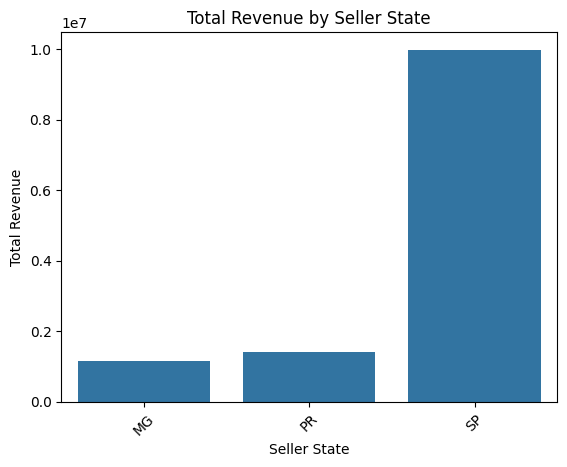

In [170]:
sns.barplot(x=pivot_sy.index, y=pivot_sy["total_revenue"])
plt.xlabel("Seller State")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Seller State")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: 
Berapa perbedaan total revenue penjualan saller di berbagai negara bagian dalam setahun terakhir ?

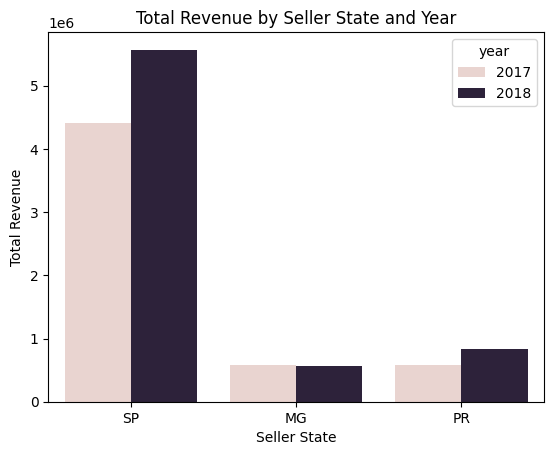

In [171]:
df = top_state.reset_index()
df.columns = ["year", "seller_state", "total_revenue"]

sns.barplot(x="seller_state", y="total_revenue", hue="year", data=df)

plt.title("Total Revenue by Seller State and Year")
plt.xlabel("Seller State")
plt.ylabel("Total Revenue")

plt.show()

### Pertanyaan 3: 
Bagaimana perbandingan saller di berbagai negara bagian dalam beberapa bulan terakhir dalam setahun ?

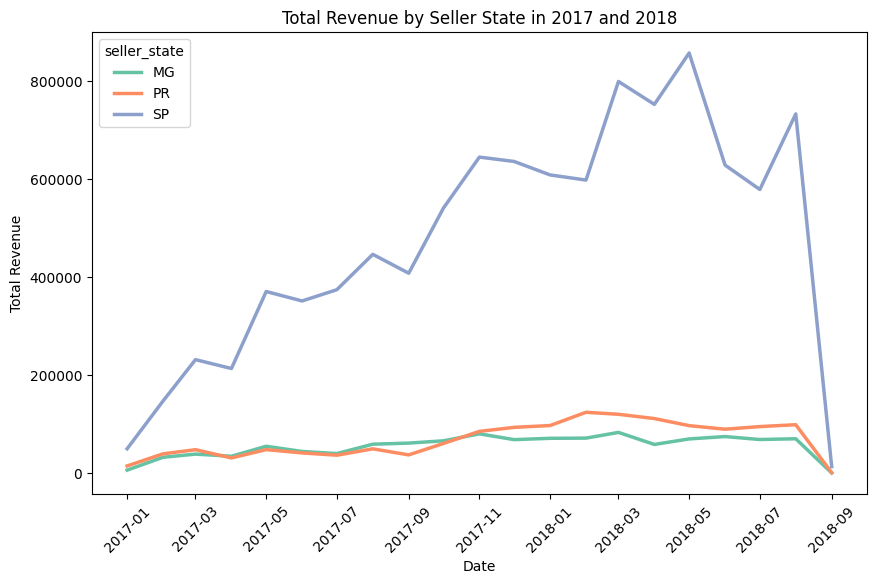

In [172]:
df_1 = df_year_revenue.reset_index()
df_1.columns = ["year", "seller_state", "total_revenue"]
df_1["month"] = df_1["year"].dt.month

df_1["date"] = df_1["month"].astype(str) + "-" + df_1["year"].dt.year.astype(str)
df_1["date"] = pd.to_datetime(df_1["date"], format="%m-%Y")

df_1 = df_1.set_index("date")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_1, x="date", y="total_revenue", hue="seller_state", 
             palette="Set2", linewidth=2.5)

plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Seller State in 2017 and 2018")

plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: 
Jenis kategori product apa yang laris dalam penjualan saller dalam setahun terakhir ?

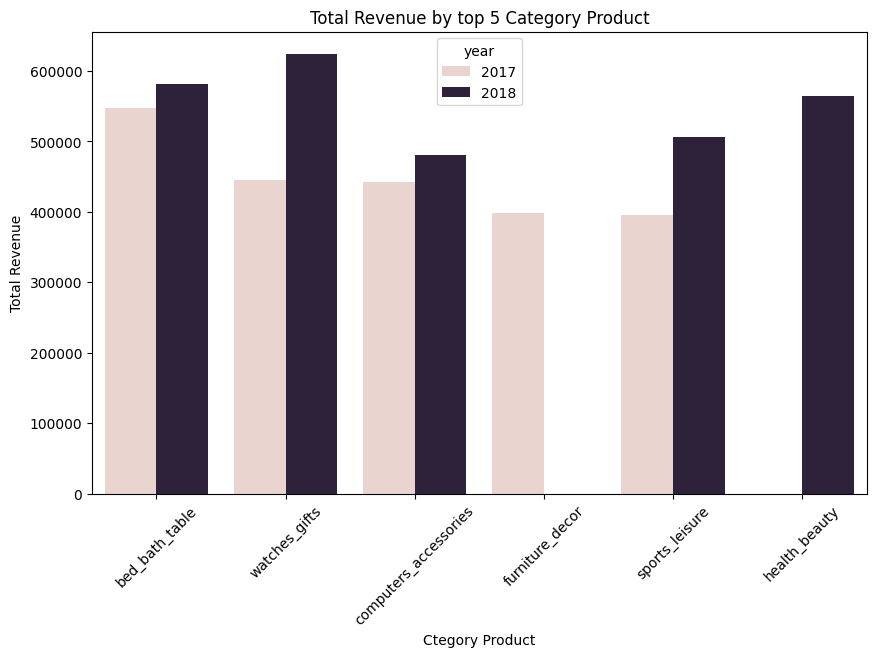

In [174]:
df_top_category_product = top_category_product.reset_index()
df_top_category_product.columns = ["year", "product category", "total revenue"]

plt.figure(figsize=(10, 6))
sns.barplot(x="product category", y="total revenue", hue="year", data=df_top_category_product)

plt.title("Total Revenue by top 5 Category Product")
plt.xlabel("Ctegory Product")
plt.ylabel("Total Revenue")

plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1

    Dari hasil tersebut bahwa, negara bagian SP mendominasi penjualan dan total revenue terbanyak di tahun 2017 dan 2018, maka dari itu untuk meningkatkan performa revenue perusahaan, penjualan aktif di perbanyak di negara bagian SP 
- Conclution pertanyaan 2

    Dari hasil tersebut bahwa total revenue dari penjualan di tahun 2018 untuk di 3 negara bagian adalah terbanyak, untuk revenue tertinggi masih di dominasi oleh negara bagian SP
- Conclution pertanyaan 3

    Kesimpulan dari hasil pertanyaan nomor 3 adalah, negara bagian yang aktif dalam kurun perbulan di tahun 2017 dan 2018 adalah negara bagian SP, untuk di tahun 2017 negara bagian SP aktif di bulan november dan di tahun 2018 aktif di bulan mei

- Conclution pertanyaan 4

    Kesimpulan tersebut adalah categori produk dengan total revenue terbanyak di tahun 2017 adalah bed bath table, dan di tahun 2018 adalah watches gifts